IMPORTING DATASET

In [4]:
import pandas as pd

# Load both tables
players_df = pd.read_csv("players.csv")
teams_df = pd.read_csv("teams.csv")

OVERVIEW OF DATASET

In [5]:
print(players_df.head())
print(teams_df.head())

       ID            Name            FullName  Age  Height  Weight  \
0  158023        L. Messi        Lionel Messi   35     169      67   
1  165153      K. Benzema       Karim Benzema   34     185      81   
2  188545  R. Lewandowski  Robert Lewandowski   33     185      81   
3  192985    K. De Bruyne     Kevin De Bruyne   31     181      70   
4  231747       K. Mbappé       Kylian Mbappé   23     182      73   

                                           PhotoUrl Nationality  Overall  \
0  https://cdn.sofifa.net/players/158/023/23_60.png   Argentina       91   
1  https://cdn.sofifa.net/players/165/153/23_60.png      France       91   
2  https://cdn.sofifa.net/players/188/545/23_60.png      Poland       91   
3  https://cdn.sofifa.net/players/192/985/23_60.png     Belgium       91   
4  https://cdn.sofifa.net/players/231/747/23_60.png      France       91   

   Potential  ...  LMRating  CMRating  RMRating LWBRating CDMRating RWBRating  \
0         91  ...        91        88    

In [6]:
print(players_df.tail())
print(teams_df.tail())

           ID          Name          FullName  Age  Height  Weight  \
18534  243725    D. Collins    Darren Collins   21     174      68   
18535  261933  Yang Dejiang      Dejiang Yang   17     175      60   
18536  267823     L. Mullan       Liam Mullan   18     170      65   
18537  267824  D. McCallion  Daithí McCallion   17     178      65   
18538  261424      N. Rabha       Nabin Rabha   25     176      66   

                                               PhotoUrl          Nationality  \
18534  https://cdn.sofifa.net/players/243/725/23_60.png  Republic of Ireland   
18535  https://cdn.sofifa.net/players/261/933/23_60.png             China PR   
18536  https://cdn.sofifa.net/players/267/823/23_60.png     Northern Ireland   
18537  https://cdn.sofifa.net/players/267/824/23_60.png  Republic of Ireland   
18538  https://cdn.sofifa.net/players/261/424/23_60.png                India   

       Overall  Potential  ...  LMRating  CMRating  RMRating LWBRating  \
18534       47         5

In [8]:
print(players_df.shape)
print(teams_df.shape)

(18539, 90)
(678, 14)


DATA CLEANING & DATA PREPROCESSING

In [9]:
#1.Check for missing values
print(players_df.isnull().sum())
print(teams_df.isnull().sum())

ID           0
Name         0
FullName     0
Age          0
Height       0
            ..
RWBRating    0
LBRating     0
CBRating     0
RBRating     0
GKRating     0
Length: 90, dtype: int64
ID                    0
Name                  0
League                0
LeagueId              0
Overall               0
Attack                0
Midfield              0
Defence               0
TransferBudget        0
DomesticPrestige      0
IntPrestige           0
Players               0
StartingAverageAge    0
AllTeamAverageAge     0
dtype: int64


In [10]:
# 2.Drop rows with too many missing values
players_df = players_df.dropna(subset=["Overall", "Potential"])
print(players_df)

           ID            Name            FullName  Age  Height  Weight  \
0      158023        L. Messi        Lionel Messi   35     169      67   
1      165153      K. Benzema       Karim Benzema   34     185      81   
2      188545  R. Lewandowski  Robert Lewandowski   33     185      81   
3      192985    K. De Bruyne     Kevin De Bruyne   31     181      70   
4      231747       K. Mbappé       Kylian Mbappé   23     182      73   
...       ...             ...                 ...  ...     ...     ...   
18534  243725      D. Collins      Darren Collins   21     174      68   
18535  261933    Yang Dejiang        Dejiang Yang   17     175      60   
18536  267823       L. Mullan         Liam Mullan   18     170      65   
18537  267824    D. McCallion    Daithí McCallion   17     178      65   
18538  261424        N. Rabha         Nabin Rabha   25     176      66   

                                               PhotoUrl          Nationality  \
0      https://cdn.sofifa.net/p

In [13]:
# 3.Convert numerical columns to correct types
players_df["Age"] = players_df["Age"].astype(int)
print(players_df.dtypes)


ID            int64
Name         object
FullName     object
Age           int64
Height        int64
              ...  
RWBRating     int64
LBRating      int64
CBRating      int64
RBRating      int64
GKRating      int64
Length: 90, dtype: object


In [15]:
# 4.Fill missing values correctly
players_df = players_df.assign(
    ClubNumber=players_df['ClubNumber'].fillna(0),
    ContractUntil=players_df['ContractUntil'].fillna('Unknown').astype(str),
    ClubPosition=players_df['ClubPosition'].fillna('Unknown')
)
print(players_df)

           ID            Name            FullName  Age  Height  Weight  \
0      158023        L. Messi        Lionel Messi   35     169      67   
1      165153      K. Benzema       Karim Benzema   34     185      81   
2      188545  R. Lewandowski  Robert Lewandowski   33     185      81   
3      192985    K. De Bruyne     Kevin De Bruyne   31     181      70   
4      231747       K. Mbappé       Kylian Mbappé   23     182      73   
...       ...             ...                 ...  ...     ...     ...   
18534  243725      D. Collins      Darren Collins   21     174      68   
18535  261933    Yang Dejiang        Dejiang Yang   17     175      60   
18536  267823       L. Mullan         Liam Mullan   18     170      65   
18537  267824    D. McCallion    Daithí McCallion   17     178      65   
18538  261424        N. Rabha         Nabin Rabha   25     176      66   

                                               PhotoUrl          Nationality  \
0      https://cdn.sofifa.net/p

In [16]:
#5.Inspect unique values in 'ContractUntil' column
print(players_df['ContractUntil'].unique())

# Convert 'ContractUntil' to datetime with explicit format (if format is known)
players_df['ContractUntil'] = pd.to_datetime(players_df['ContractUntil'], format='%Y-%m-%d', errors='coerce')

['2023.0' '2025.0' '2024.0' '2026.0' '2027.0' '2022.0' '2028.0' 'Unknown'
 '2031.0' '2032.0']


ANALYSING THE DATA AND VISUALIZING IT

Club
FC Bayern München      80.590909
Paris Saint-Germain    79.807692
Inter                  79.730769
Liverpool              78.666667
Manchester City        78.518519
Villarreal CF          77.961538
RB Leipzig             77.708333
AFC Richmond           77.565217
Juventus               77.354839
AC Milan               77.312500
Name: Overall, dtype: float64


<ipython-input-19-acf19ce2b8aa>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.index, y=top_teams.values, palette="coolwarm")


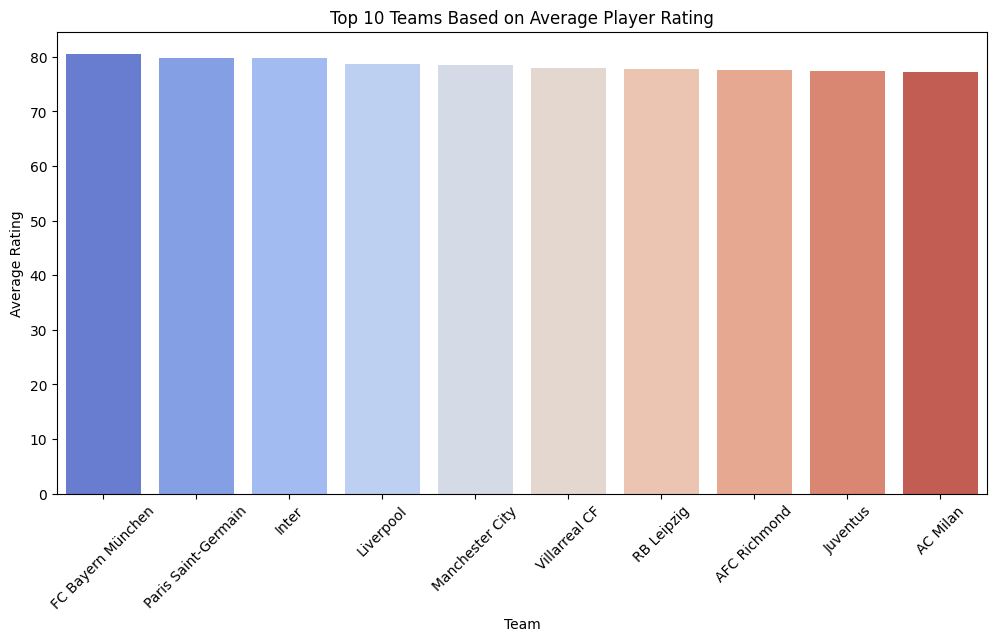

In [19]:
#1.Top 10 Teams Based on Average Player Rating

import matplotlib.pyplot as plt
import seaborn as sns

top_teams = players_df.groupby("Club")["Overall"].mean().sort_values(ascending=False).head(10)
print(top_teams)
#Bar Chart for Top Teams
plt.figure(figsize=(12, 6))
sns.barplot(x=top_teams.index, y=top_teams.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Teams Based on Average Player Rating")
plt.xlabel("Team")
plt.ylabel("Average Rating")
plt.show()


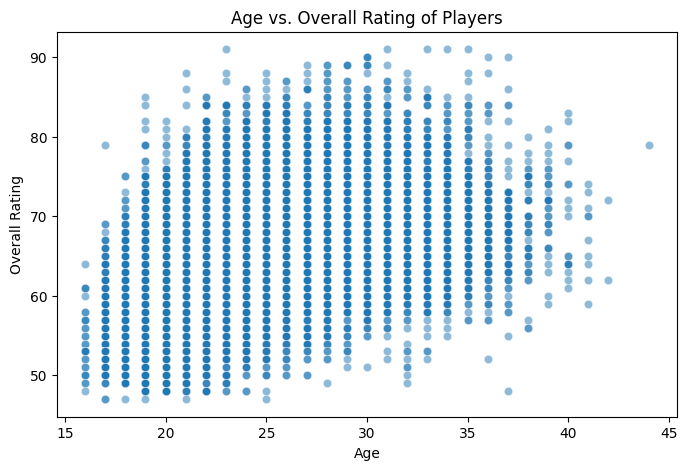

In [20]:
#2.Correlation Between Age & Player Rating

plt.figure(figsize=(8,5))
sns.scatterplot(x=players_df["Age"], y=players_df["Overall"], alpha=0.5)
plt.title("Age vs. Overall Rating of Players")
plt.xlabel("Age")
plt.ylabel("Overall Rating")
plt.show()


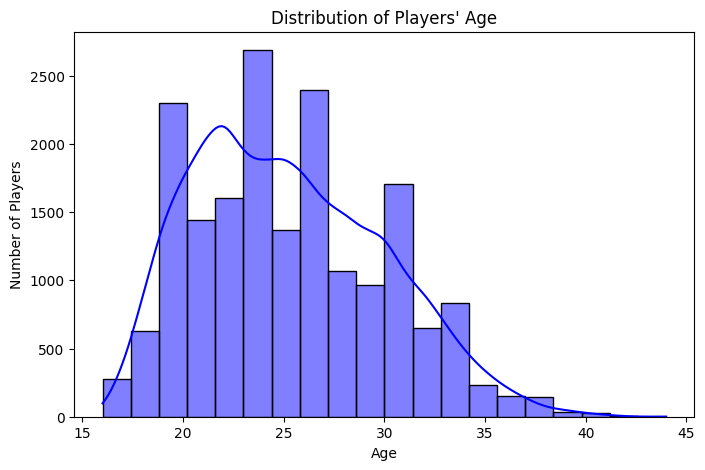

In [21]:
#3.Player Age Distribution

plt.figure(figsize=(8, 5))
sns.histplot(players_df["Age"], bins=20, kde=True, color="blue")
plt.title("Distribution of Players' Age")
plt.xlabel("Age")
plt.ylabel("Number of Players")
plt.show()

<ipython-input-22-5f0521398dee>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")


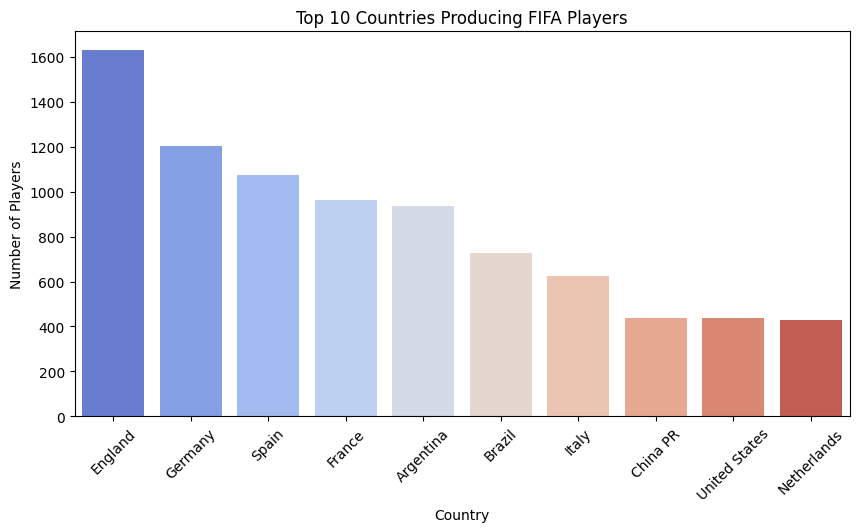

In [22]:
#4.Top 10 Countries Producing FIFA Players

top_countries = players_df["Nationality"].value_counts().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Countries Producing FIFA Players")
plt.xlabel("Country")
plt.ylabel("Number of Players")
plt.show()

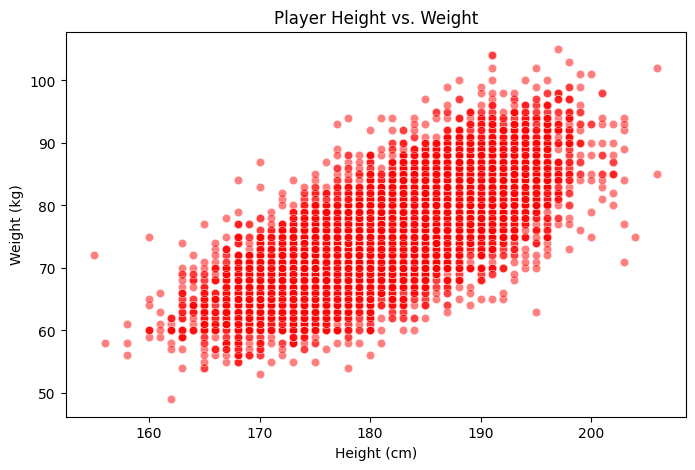

In [23]:
#5.Player Height vs. Weight Scatter Plot

plt.figure(figsize=(8,5))
sns.scatterplot(x=players_df["Height"], y=players_df["Weight"], alpha=0.5, color="red")
plt.title("Player Height vs. Weight")
plt.xlabel("Height (cm)")
plt.ylabel("Weight (kg)")
plt.show()